In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs:", physical_devices)
tf.config.experimental.set_visible_devices(physical_devices[1], 'GPU')

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

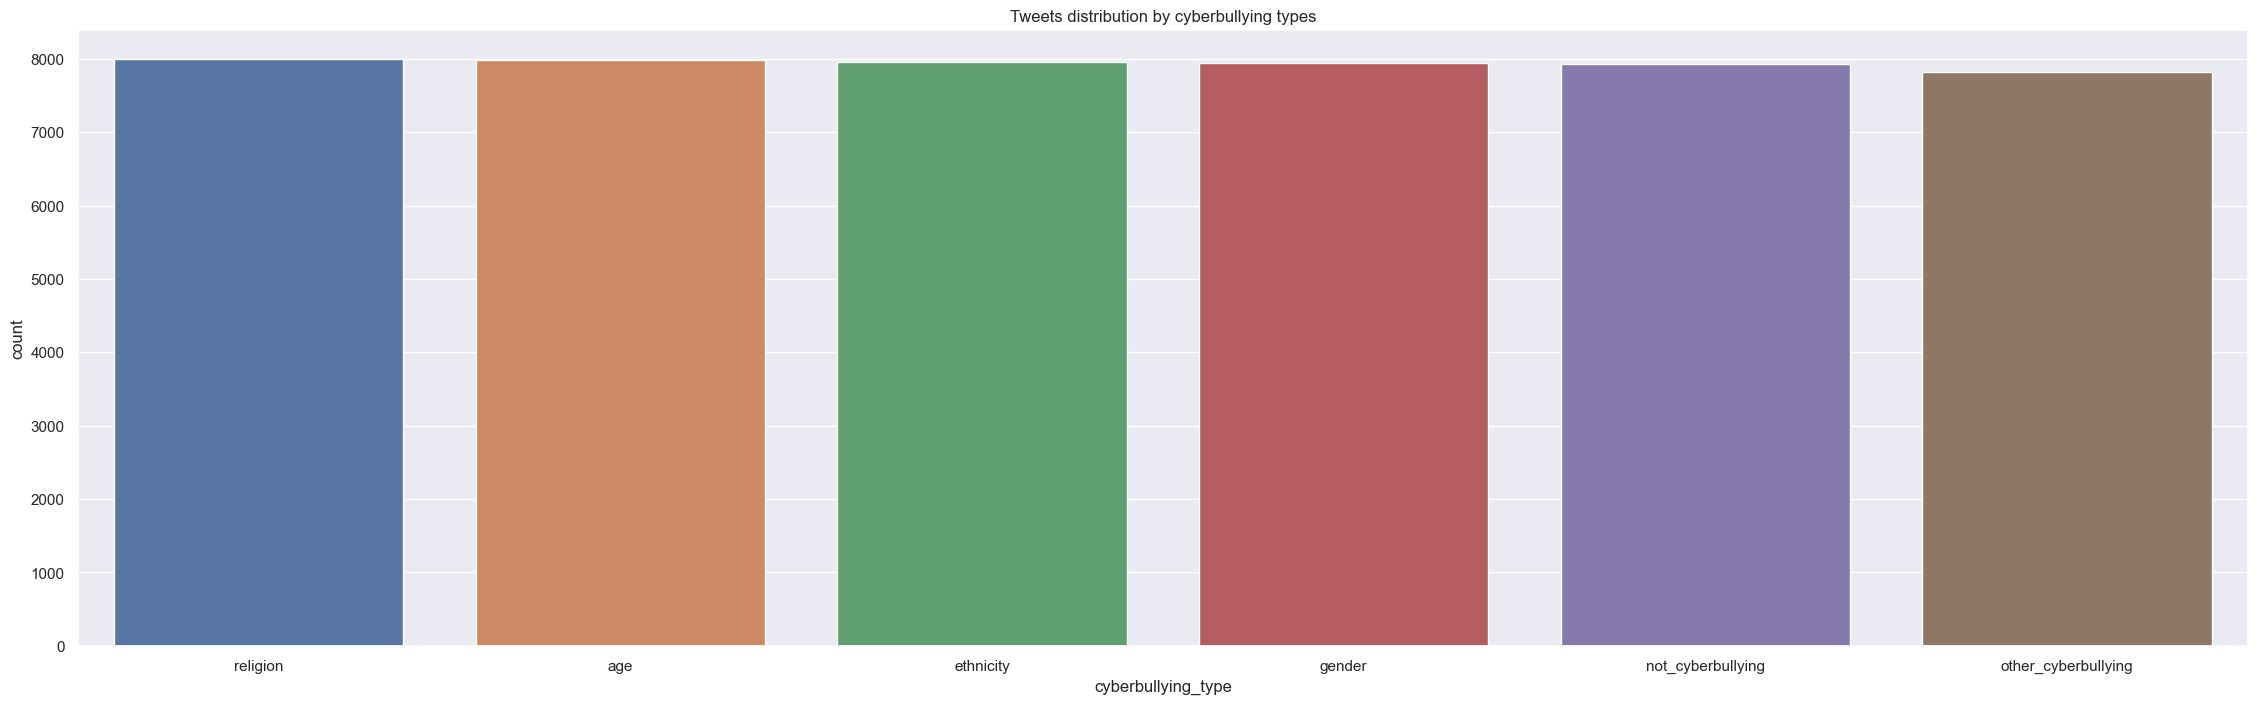

In [3]:
df = pd.read_csv("C:/Users/AMI_LAB/Downloads/Lab Work/code/cyberbully classify/dataset_preparation/categorical_data.csv")
df = df.drop_duplicates()
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

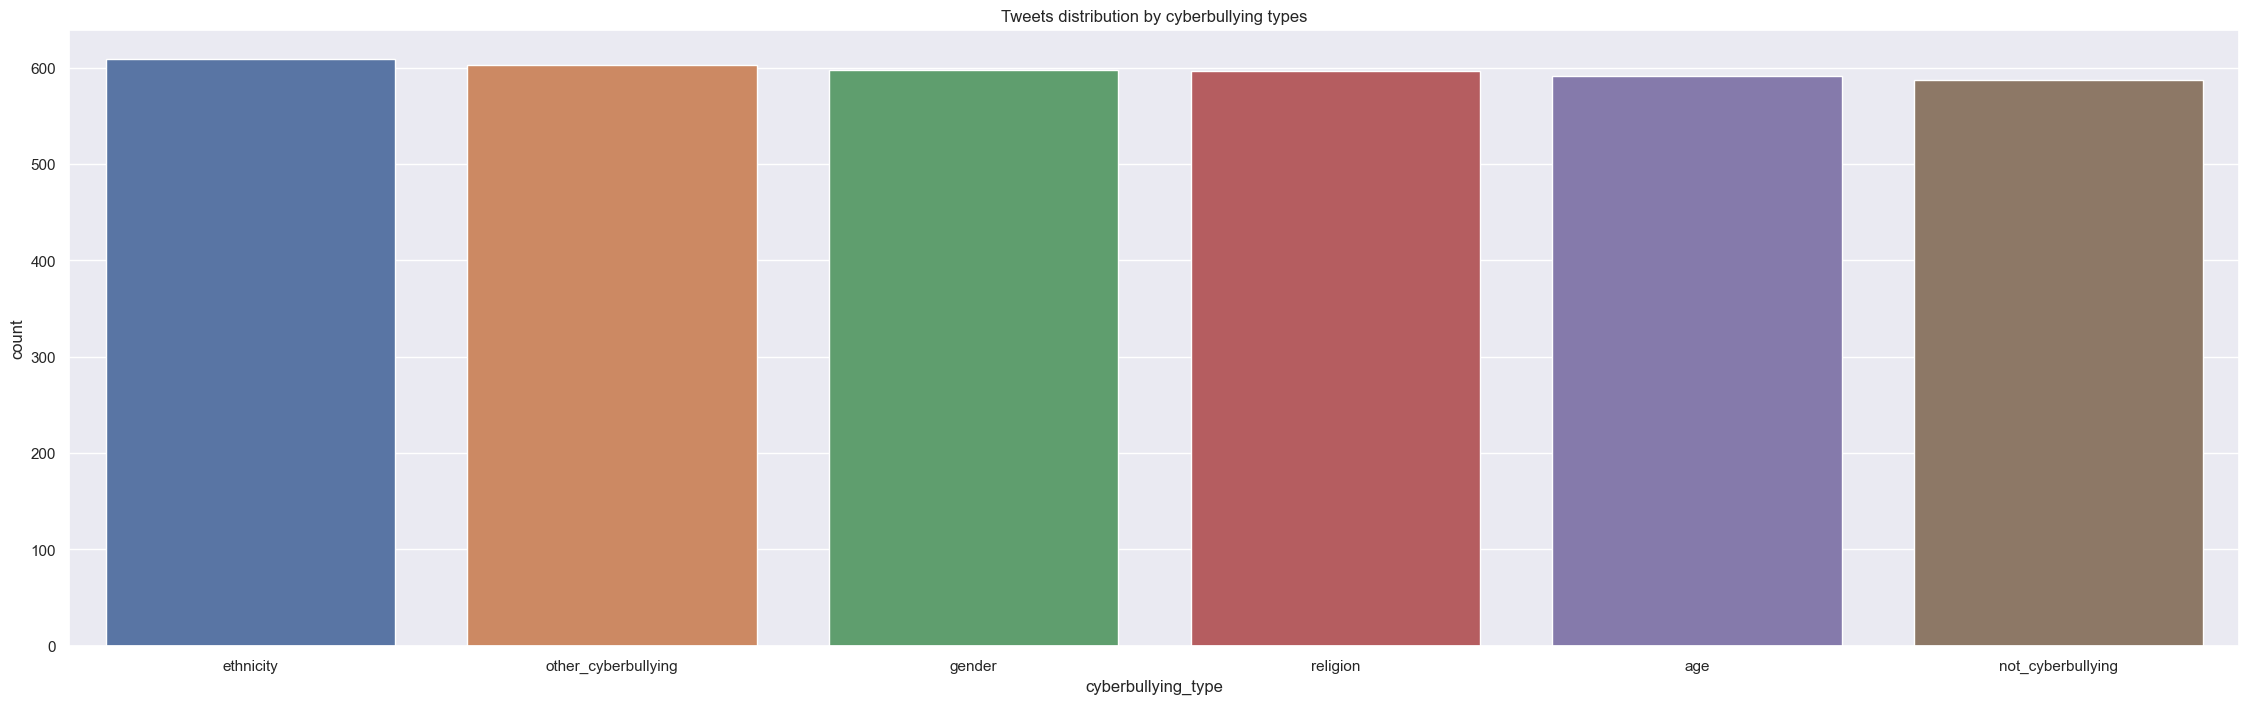

In [4]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-350
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])       
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [5]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
def initial_cleaning(text):
    # text = re.sub(r"^RT[\s]+","",text)
    # text = text.lower()
    # text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    # text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    # text = re.sub(r'[0-9]',' ',text) 
    # text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    # text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return initial_cleaning(text)


df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,7357,RT @GCobber99: Bloody hell is there One libera...,not_cyberbullying,RT @GCobber99: Bloody hell is there One libera...
1,7358,"assunto no programa do Jô agora é bullying, ou...",not_cyberbullying,"assunto no programa do Jô agora é bullying, ou..."
2,7359,RT @_peech: How @therealroseanne sees trans pp...,not_cyberbullying,RT @_peech: How @therealroseanne sees trans pp...
3,7360,Colin's in good form tonight #MKR,not_cyberbullying,Colin's in good form tonight #MKR
4,7361,i would never want to get bullied.,not_cyberbullying,i would never want to get bullied.
...,...,...,...,...
3581,47687,"Black ppl aren't expected to do anything, depe...",ethnicity,"Black ppl aren't expected to do anything, depe..."
3582,47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner did not withhold his disappointment. Tu...
3583,47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear to God. This dumb nigger bitch. I have...
3584,47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [7]:
from nltk.util import ngrams
text_list=df["tweet_text"].tolist()
omega_text_words = []
n=1


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [9]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labels=np.array(df["cyberbullying_type"].tolist())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(6, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [10]:
from numpy import dot
from numpy.linalg import norm


#Our sentences we like to encode
sentences = text_list
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)


In [11]:
from numpy.random.mtrand import random
from sklearn.utils import shuffle
sentences,text_list,embeddings,integer_encoded,onehot_encoded=shuffle(sentences,text_list,embeddings,integer_encoded,onehot_encoded,random_state=0)

In [12]:
#construct over adjency matrix
from sklearn.metrics.pairwise import cosine_similarity
A=cosine_similarity(embeddings, embeddings)
thresh=0.5
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
      if A[i,j]<thresh:
        A[i,j]=0

source=[]
target=[]
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if A[i,j]==1:
            source.append(i)
            target.append(j)


Edges=np.hstack((np.array(source).reshape(-1,1),np.array(target).reshape(-1,1)))
Node_features=embeddings
Node_labels=integer_encoded


record=np.arange(len(sentences))
random_indices = np.random.permutation(range(len(sentences)))

# 50/50 split
train_indices = record[random_indices[: len(random_indices) // 2]]
test_indices = record[random_indices[len(random_indices) // 2 :]]



# Obtain ground truth labels corresponding to each paper_id
train_labels = Node_labels[random_indices[: len(random_indices) // 2]]
test_labels = Node_labels[random_indices[len(random_indices) // 2 :]]

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import warnings


class GraphAttention(layers.Layer):
    def __init__(
        self,
        units,
        kernel_initializer="glorot_uniform",
        kernel_regularizer=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.units = units
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)

    def build(self, input_shape):

        self.kernel = self.add_weight(
            shape=(input_shape[0][-1], self.units),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel",
        )
        self.kernel_attention = self.add_weight(
            shape=(self.units * 2, 1),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel_attention",
        )
        self.built = True

    def call(self, inputs):
        node_states, edges = inputs

        # Linearly transform node states
        node_states_transformed = tf.matmul(node_states, self.kernel)

        # (1) Compute pair-wise attention scores
        node_states_expanded = tf.gather(node_states_transformed, edges)
        node_states_expanded = tf.reshape(
            node_states_expanded, (tf.shape(edges)[0], -1)
        )
        attention_scores = tf.nn.leaky_relu(
            tf.matmul(node_states_expanded, self.kernel_attention)
        )
        attention_scores = tf.squeeze(attention_scores, -1)

        # (2) Normalize attention scores
        attention_scores = tf.math.exp(tf.clip_by_value(attention_scores, -2, 2))
        attention_scores_sum = tf.math.unsorted_segment_sum(
            data=attention_scores,
            segment_ids=edges[:, 0],
            num_segments=tf.reduce_max(edges[:, 0]) + 1,
        )
        attention_scores_sum = tf.repeat(
            attention_scores_sum, tf.math.bincount(tf.cast(edges[:, 0], "int32"))
        )
        attention_scores_norm = attention_scores / attention_scores_sum

        # (3) Gather node states of neighbors, apply attention scores and aggregate
        node_states_neighbors = tf.gather(node_states_transformed, edges[:, 1])
        out = tf.math.unsorted_segment_sum(
            data=node_states_neighbors * attention_scores_norm[:, tf.newaxis],
            segment_ids=edges[:, 0],
            num_segments=tf.shape(node_states)[0],
        )
        return out


class MultiHeadGraphAttention(layers.Layer):
    def __init__(self, units, num_heads=4, merge_type="concat", **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]

    def call(self, inputs):
        atom_features, pair_indices = inputs

        # Obtain outputs from each attention head
        outputs = [
            attention_layer([atom_features, pair_indices])
            for attention_layer in self.attention_layers
        ]
        # Concatenate or average the node states from each head
        if self.merge_type == "concat":
            outputs = tf.concat(outputs, axis=-1)
        else:
            outputs = tf.reduce_mean(tf.stack(outputs, axis=-1), axis=-1)
        # Activate and return node states
        return tf.nn.relu(outputs)


class GraphAttentionNetwork(keras.Model):
    def __init__(
        self,
        node_states,
        edges,
        hidden_units,
        num_heads,
        num_layers,
        output_dim,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.node_states = node_states
        self.edges = edges
        self.preprocess = layers.Dense(hidden_units * num_heads, activation="relu")
        self.attention_layers = [
            MultiHeadGraphAttention(hidden_units, num_heads) for _ in range(num_layers)
        ]
        self.output_layer = layers.Dense(output_dim)

    def call(self, inputs):
        node_states, edges = inputs
        x = self.preprocess(node_states)
        for attention_layer in self.attention_layers:
            x = attention_layer([x, edges]) + x
        outputs = self.output_layer(x)
        return outputs

    def train_step(self, data):
        indices, labels = data

        with tf.GradientTape() as tape:
            # Forward pass
            outputs = self([self.node_states, self.edges])
            # Compute loss
            loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, data):
        indices = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute probabilities
        return tf.nn.softmax(tf.gather(outputs, indices))

    def test_step(self, data):
        indices, labels = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute loss
        loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}


In [14]:
# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 16
NUM_LAYERS = 3
OUTPUT_DIM = 6
NUM_EPOCHS=50
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.1
LEARNING_RATE = 1e-3
MOMENTUM = 0.9

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(LEARNING_RATE)
accuracy_fn = keras.metrics.SparseCategoricalAccuracy(name="acc")
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=1e-5, patience=5, restore_best_weights=True
)

# Build model
gat_model = GraphAttentionNetwork(
    Node_features, Edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM
)

# Compile model
gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

history=gat_model.fit(
    x=train_indices,
    y=train_labels,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    # callbacks=[early_stopping],
    verbose=2,
)

_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)

print("--" * 38 + f"\nTest Accuracy {test_accuracy*100:.1f}%")


Epoch 1/50
51/51 - 23s - loss: 1.2459 - acc: 0.6820 - val_loss: 0.8722 - val_acc: 0.7778 - 23s/epoch - 455ms/step
Epoch 2/50
51/51 - 2s - loss: 0.6652 - acc: 0.7917 - val_loss: 0.6520 - val_acc: 0.7944 - 2s/epoch - 42ms/step
Epoch 3/50
51/51 - 2s - loss: 0.4951 - acc: 0.8301 - val_loss: 0.6769 - val_acc: 0.7722 - 2s/epoch - 44ms/step
Epoch 4/50
51/51 - 2s - loss: 0.4079 - acc: 0.8617 - val_loss: 0.7022 - val_acc: 0.7889 - 2s/epoch - 43ms/step
Epoch 5/50
51/51 - 2s - loss: 0.3272 - acc: 0.8927 - val_loss: 0.7560 - val_acc: 0.7778 - 2s/epoch - 41ms/step
Epoch 6/50
51/51 - 2s - loss: 0.2816 - acc: 0.9095 - val_loss: 0.7324 - val_acc: 0.7722 - 2s/epoch - 42ms/step
Epoch 7/50
51/51 - 2s - loss: 0.2746 - acc: 0.9188 - val_loss: 0.8906 - val_acc: 0.7889 - 2s/epoch - 43ms/step
Epoch 8/50
51/51 - 2s - loss: 0.2053 - acc: 0.9467 - val_loss: 0.7781 - val_acc: 0.7833 - 2s/epoch - 43ms/step
Epoch 9/50
51/51 - 2s - loss: 0.1689 - acc: 0.9566 - val_loss: 0.9540 - val_acc: 0.8000 - 2s/epoch - 39ms/ste

In [15]:
# save val_loss, val_acc, loss, acc as csv with headers
acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']

# save val_loss, val_acc, loss, acc as csv with headers
import pandas as pd
df = pd.DataFrame({'val_loss':val_loss, 'val_acc':val_acc, 'loss':loss, 'acc':acc})
df.to_csv('Node_classify_S_transformer_GAT.csv', index=False)

<AxesSubplot:>

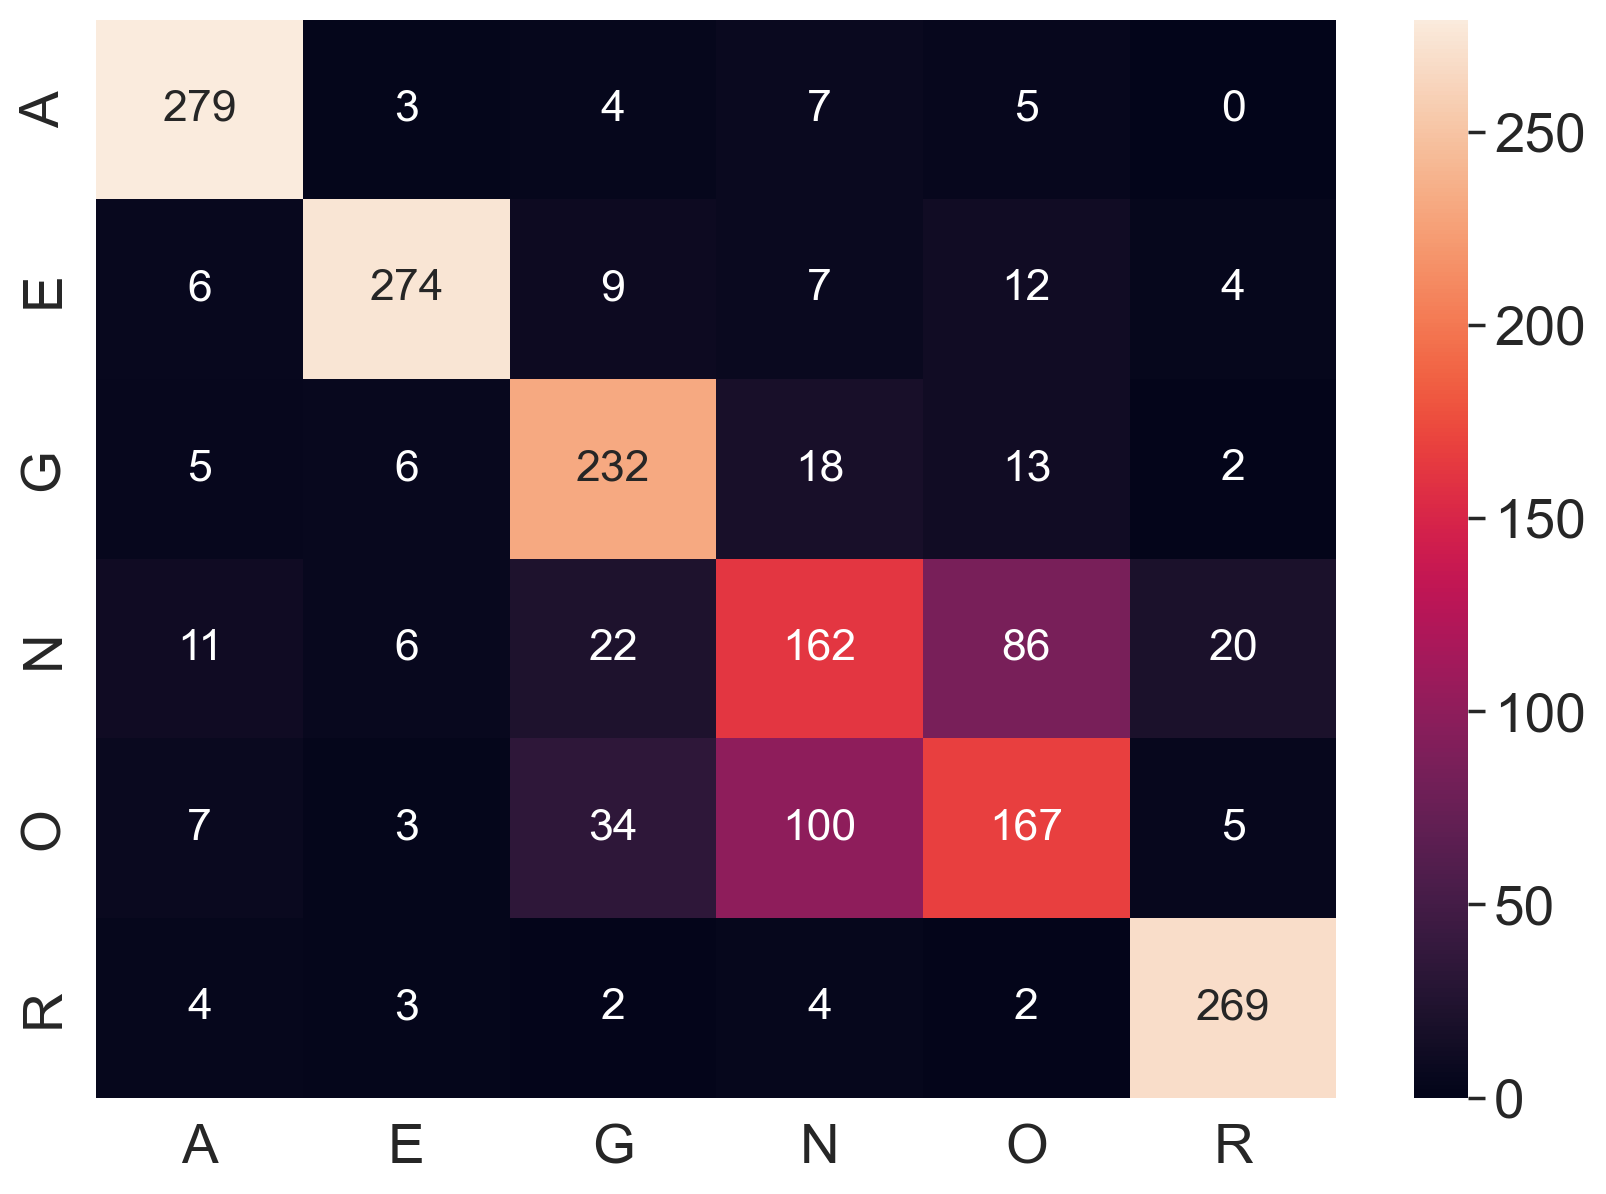

In [16]:
ref=test_labels
predictions=np.argmax(gat_model.predict(x=test_indices, verbose=0),axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ref,predictions)



label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
label_abbreviations = [label[0].upper() for label in label_names]


#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, label_abbreviations, label_abbreviations)
plt.figure(figsize = (10,7),dpi=200)
sn.set(font_scale=1.8)  # Increase the font size for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

In [17]:
from sklearn.metrics import classification_report

print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8942    0.9362    0.9148       298
           1     0.9288    0.8782    0.9028       312
           2     0.7657    0.8406    0.8014       276
           3     0.5436    0.5277    0.5355       307
           4     0.5860    0.5285    0.5557       316
           5     0.8967    0.9472    0.9212       284

    accuracy                         0.7713      1793
   macro avg     0.7692    0.7764    0.7719      1793
weighted avg     0.7665    0.7713    0.7680      1793

